# Project: Feature engineering in science
## The process of scientific discovery
<b>Author:</b> Joeri van Wijngaarden<br>
<b>Date:</b> 07.04.2019<br>
<b>Source:</b> http://joerivanwijngaarden.com/project-feature-engineering-science.html<br>
<b>Github:</b> https://github.com/tingidev/jvw-projects/tree/master/project-3-feature-engineering-science<p>

In [1]:
# Load packages
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Scipy
from scipy.ndimage import gaussian_filter
from scipy.signal import butter, lfilter, hilbert

## Functions

In [2]:
# See: https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter

def butter_bandpass(lowcut, highcut, fs, order=9):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=9):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Scientific data pipeline (Fig. 1, 2 & 3)

In [4]:
# Generate random data for demonstration
sample_n = 200
angle1 = np.append(np.random.random(int(sample_n/2)), np.random.random(int(sample_n/2))*-1) * np.pi
angle2 = np.append(np.random.random(int(sample_n/2)), np.random.random(int(sample_n/2))*-1) * np.pi
r1 = np.random.random(sample_n)*0.2+0.8
r2 = np.random.random(sample_n)*0.2+0.6
x1 = np.cos(angle1)*r1
y1 = np.sin(angle1)*r1
x2 = np.cos(angle2)*r2
y2 = np.sin(angle2)*r2

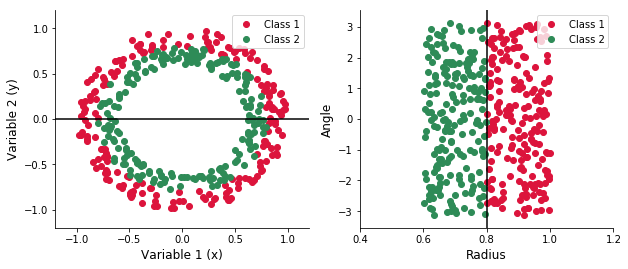

In [6]:
# Figure 1
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

for i,ax in enumerate(axs):
    if i==0:
        ax.plot(x1, y1, 'o', color='crimson', label='Class 1')
        ax.plot(x2, y2, 'o', color='seagreen', label='Class 2')
        ax.plot((-1.2, 1.2), (0, 0), 'k-')
        ax.set_xlim((-1.2, 1.2))
        ax.set_ylim((-1.2, 1.2))
        ax.set_xticks(np.linspace(-1, 1, 5))
        ax.set_yticks(np.linspace(-1, 1, 5))
        ax.set_xlabel('Variable 1 (x)', fontsize=12)
        ax.set_ylabel('Variable 2 (y)', fontsize=12)
    else:
        ax.plot(r1, angle1, 'o', color='crimson', label='Class 1')
        ax.plot(r2, angle2, 'o', color='seagreen', label='Class 2')
        ax.plot((0.8, 0.8), (-np.pi-0.4, np.pi+0.4), 'k-')
        ax.set_xlim((0.4, 1.2))
        ax.set_ylim((-np.pi-0.4, np.pi+0.4) )
        ax.set_xticks(np.linspace(0.4, 1.2, 5))
        ax.set_xlabel('Radius', fontsize=12)
        ax.set_ylabel('Angle', fontsize=12)
    ax.legend(loc='upper right')    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# plt.savefig('./images/fig1.png',bbox_inches='tight')

In [8]:
### Read data files 
lfp = pd.read_csv('./data/trace_raw.csv', header=None, names=['lfp'])
filt = pd.read_csv('./data/trace_filtered.csv', header=None, names=['filt'])
times = pd.read_csv('./data/trace_times.csv', header=None, names=['times'])
data = pd.concat([lfp, filt, times], axis=1)

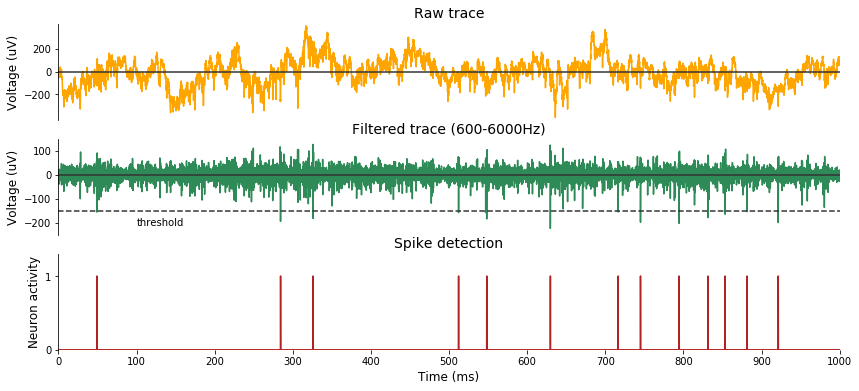

In [10]:
# Figure 2
time2use = 15000
spikes = np.where(data['filt'].values.flatten()[:time2use]<-150)[0]
spikes = np.delete(spikes, 6) # remove noisy index
spikevect = np.zeros(time2use)
spikevect[spikes] = 1

fig, axs = plt.subplots(nrows=3, figsize=(14, 6))

for i, ax in enumerate(axs):
    if i==0:
        ax.plot(dat['lfp'].values.flatten()[:time2use], color='orange')
        ax.plot([0, len(spikevect)], [0, 0], '-', color=[.2, .2, .2])
        ax.set_title('Raw trace', fontsize=14)
        ax.set_xticks([])
        ax.set_ylim([-420, 420])
        ax.set_yticks([-200, 0, 200])
        ax.set_ylabel('Voltage (uV)', fontsize=12)
    elif i==1:
        ax.plot(data['filt'].values.flatten()[:time2use], color='seagreen')
        ax.plot([0, len(spikevect)], [0, 0], '-', color=[.2, .2, .2])
        ax.plot([0, len(spikevect)], [-150, -150], '--', color=[.2, .2, .2])
        ax.set_title('Filtered trace (600-6000Hz)', fontsize=14)
        ax.set_xticks([])
        ax.set_ylim([-250, 150])
        ax.set_ylabel('Voltage (uV)', fontsize=12)
        ax.text(1500, -210, 'threshold')
    else:
        ax.plot(spikevect, color='firebrick')
        ax.set_title('Spike detection', fontsize=14)
        ax.set_xticks(np.linspace(0, 15000, 11))
        ax.set_xticklabels(np.linspace(0, 1000, 11, dtype=int))
        ax.set_xlabel('Time (ms)', fontsize=12)
        ax.set_ylim([0, 1.3])
        ax.set_yticks([0, 1])
        ax.set_ylabel('Neuron activity', fontsize=12)
    ax.set_xlim([0, len(spikevect)])
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
# plt.savefig('./images/fig2.png',bbox_inches='tight')

In [11]:
### Read new data files 
lfp = pd.read_csv('./data/ca1_lfp.csv', header=None, names=['lfp'])
th = pd.read_csv('./data/ca1_phase.csv', header=None, names=['theta'])
spikes = pd.read_csv('./data/ca1_spikes.csv', header=None, names=['spikes'])
x = pd.read_csv('./data/ca1_x.csv', header=None, names=['x'])
y = pd.read_csv('./data/ca1_y.csv', header=None, names=['y'])
s = pd.read_csv('./data/ca1_s.csv', header=None, names=['s'])
hd = pd.read_csv('./data/ca1_hd.csv', header=None, names=['hd'])
data = pd.concat([lfp, th, spikes, x, y, s, hd], axis=1)

In [12]:
# Extract relevant data
spike_times = np.where(spikes==1)[0]
spike_x = x.iloc[spike_times]
spike_y = y.iloc[spike_times]
spike_th = th.iloc[spike_times]

# Get heatmap
nbins = 20
xedges = np.linspace(x.min(), x.max(), nbins+1)
yedges = np.linspace(y.min(), y.max(), nbins+1)
hist_pos, xedges, yedges = np.histogram2d(x.values.flatten(), y.values.flatten(), bins=(xedges, yedges))
hist_spike, xedges, yedges = np.histogram2d(spike_x.values.flatten(), spike_y.values.flatten(), bins=(xedges, yedges))
rate_map = np.divide(hist_spike, hist_pos)*1000 # convert from ms to sec
rate_map[np.isnan(rate_map)] = 0
rate_map_filt = gaussian_filter(rate_map, sigma=1)

C:\Users\jvw\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


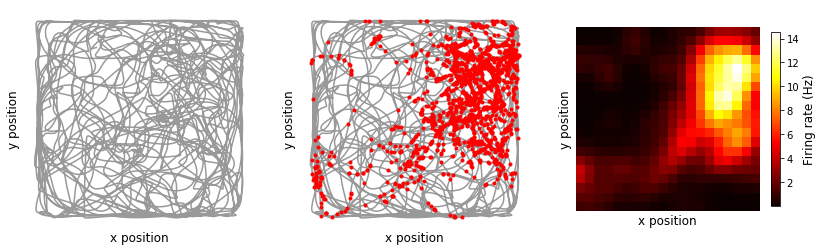

In [13]:
# Figure3
fig, axs = plt.subplots(ncols=3, figsize=(14, 4))

for i, ax in enumerate(axs):
    if i==0:
        ax.plot(x, y, color=[0.6, 0.6, 0.6])
    elif i==1:
        ax.plot(x, y, color=[0.6, 0.6, 0.6])
        ax.plot(spike_x, spike_y, 'r.')
    else:
        h1 = plt.imshow(rate_map_filt.transpose(), origin='lower', cmap='hot')
        cbar = fig.colorbar(h1, shrink=0.8)
        cbar.set_label('Firing rate (Hz)', fontsize=12)
    ax.set_xlabel('x position', fontsize=12)
    ax.set_ylabel('y position', fontsize=12)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
# plt.savefig('./images/fig3.png',bbox_inches='tight')

## Internal brain dynamics (Fig. 4 & 5)

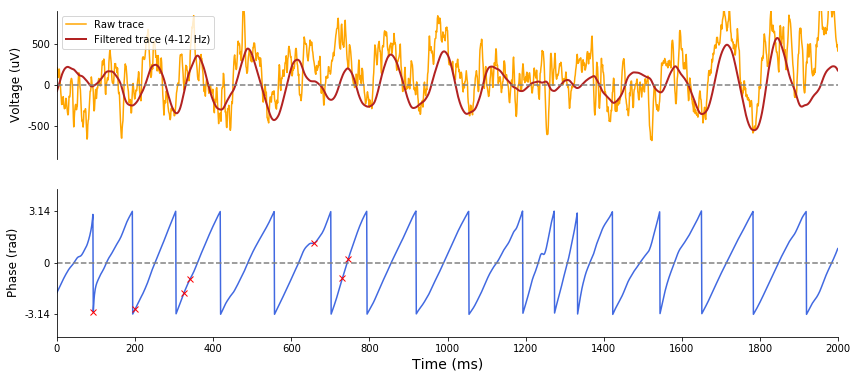

In [16]:
# Filter parameters
t2use = range(18600, 20600)
x = lfp.values.flatten()
fs = 1000.0
lowcut = 4.0
highcut = 12.0
order = 2

# Filter
b, a = butter_bandpass(lowcut, highcut, fs, order=order)
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=order)
analytic_signal = hilbert(y)

# Get spikes
idx = spike_times[np.where((spike_times>18600) & (spike_times<20600))]+1 # correct offset
spikes_theta = np.angle(analytic_signal[idx])

# Figure 4
fig, axs = plt.subplots(nrows=2, figsize=(14, 6))

for i, ax in enumerate(axs):
    if i==0:
        ax.plot(x[t2use], color='orange', label='Raw trace')
        ax.plot(y[t2use], color='firebrick', linewidth=2, label='Filtered trace (4-12 Hz)')
        ax.set_ylim([-9000, 9000])
        ax.set_yticks(np.linspace(-5000, 5000, 3))
        ax.set_yticklabels([-500, 0, 500]) # rescale
        ax.set_xticks([])
        ax.legend(loc='upper left')
        ax.set_ylabel('Voltage (uV)', fontsize=12)
        ax.spines['bottom'].set_visible(False)
    else:
        ax.plot(np.angle(analytic_signal[t2use]), color='royalblue')
        ax.plot(idx-t2use[0], spikes_theta, 'rx', markersize=6)
        ax.set_ylim([-4.5, 4.5])
        ax.set_yticks([-np.pi, 0, np.pi])
        ax.set_yticklabels(['-3.14', '0', '3.14'])
        ax.set_xticks(np.linspace(0, 2000, 11))
        ax.set_xticklabels(np.linspace(0, 2000, 11, dtype=int))
        ax.set_xlabel('Time (ms)', fontsize=14)
        ax.set_ylabel('Phase (rad)', fontsize=12)
    ax.plot([0, 2000], [0, 0], '--', color=[.5, .5, .5])
    ax.set_xlim([0, 2000])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# plt.savefig('./images/fig4.png',bbox_inches='tight')

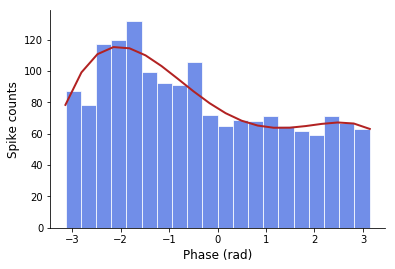

In [19]:
# Figure 5
spikes_phase = spike_th.values.flatten()
fig, ax = plt.subplots(figsize=(6, 4))
n, bins, patches = ax.hist(spikes_phase, bins=20, edgecolor='w', facecolor='royalblue', alpha=0.75)
x = np.linspace(-np.pi, np.pi, len(n))
ax.plot(x, np.poly1d(np.polyfit(x, n, 4))(x), color='firebrick', linewidth=2)
ax.set_ylabel('Spike counts', fontsize=12)
ax.set_xlabel('Phase (rad)', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig('./images/fig5.png',bbox_inches='tight')